In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtp
%matplotlib inline
COLUNA = 1

In [2]:
precos = np.linspace(7, 51, 50)
diametros = [7, 10, 15, 30, 45]

In [3]:
p1 = [x for x in precos if x >=7 and x < 10]
p2 = [x for x in precos if x >=10 and x < 15]
p3 = [x for x in precos if x >=15 and x < 30]
p4 = [x for x in precos if x >=30 and x < 44]
p5 = [x for x in precos if x >45]

catalogo = {}
catalogo[7] = p1
catalogo[10] = p2
catalogo[15] = p3
catalogo[30] = p4
catalogo[45] = p5

diam = []
prec = []
for key in catalogo:  #accessing values
    for it in catalogo[key]:
        diam.append(list([key]))
        prec.append(list([it]))        

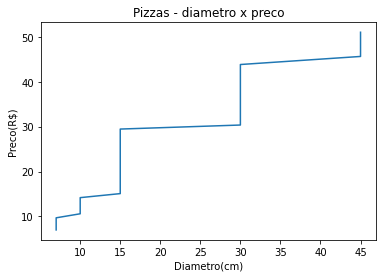

In [4]:
fig = plt.figure()
plt.xlabel('Diametro(cm)')
plt.ylabel('Preco(R$)')
plt.title('Pizzas - diametro x preco')
plt.plot(diam, prec)

In [5]:
import sklearn
sklearn.__version__

'0.22'

In [8]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(diam, prec)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
novoDiametro = 28
print("O custo de uma pizza de %d cm de diâmetro será de: R$%.2f" % (novoDiametro, modelo.predict([[novoDiametro]])))
novoDiametro = 20
print("O custo de uma pizza de %d cm de diâmetro será de: R$%.2f" % (novoDiametro, modelo.predict([[novoDiametro]])))

O custo de uma pizza de 28 cm de diâmetro será de: R$33.71
O custo de uma pizza de 20 cm de diâmetro será de: R$25.63


In [11]:
# Coeficientes
print('Coeficiente: \n', modelo.coef_)

Coeficiente: 
 [[1.00941748]]


In [45]:
def performance(modeloLinear, val_x, val_y):
    print('O MSE (erro médio quadrado) é %2f' % np.mean((modeloLinear.predict(val_x)-val_y)**2))
    print('Score de variação: %2f (melhor performance = 1)' % modeloLinear.score(val_x,val_y))

In [46]:
#MSE
performance(modelo, diam, prec)

O MSE (erro médio quadrado) é 17.960288
Score de variação: 0.891938 (melhor performance = 1)


(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text major ticklabel objects>)

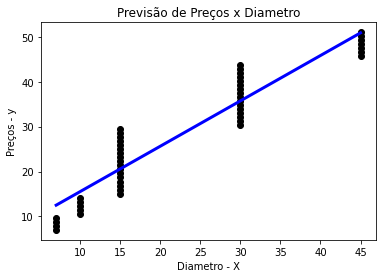

In [18]:
#Scatter Polt:
plt.scatter(diam, prec, color='black')
plt.plot(diam, modelo.predict(diam), color="blue", linewidth=3)
plt.xlabel('Diametro - X')
plt.ylabel('Preços - y')
plt.title('Previsão de Preços x Diametro')
plt.xticks()
plt.yticks()

In [19]:
import pandas as pd
import scipy.stats as stats

In [20]:
pd.__version__

'1.0.5'

In [21]:
from sklearn.datasets import load_boston
dados = load_boston()

In [26]:
print(dados.data.shape)
print(dados.DESCR)

(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - P

In [29]:
data = pd.DataFrame(dados.data)
colunas = dados.feature_names
data.columns = colunas
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [30]:
data['Price'] = dados.target

In [31]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [33]:
#Construindo a Previsão
X = data.drop('Price', axis=COLUNA)
y = data.Price

In [42]:
def grafico_dispersao(val_x, val_y, label_x, label_y, titulo):
    plt.scatter(val_x, val_y, color='blue')
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(titulo)
    plt.show()

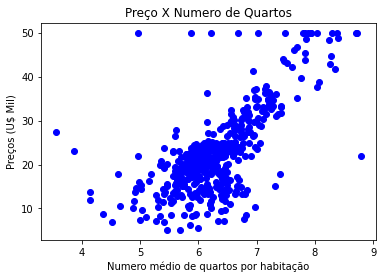

In [43]:
grafico_dispersao(data.RM, y, 'Numero médio de quartos por habitação', 'Preços (U$ Mil)', 'Preço X Numero de Quartos')

In [40]:
regressao = LinearRegression()
regressao.fit(X, y)
print('Coeficiente:', regressao.intercept_)
print('Quantidade de Coeficientes:', len(regressao.coef_))

Coeficientes: 36.459488385089855
Quantidade de Coeficientes: 13


In [41]:
previsao = regressao.predict(X)
previsao

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

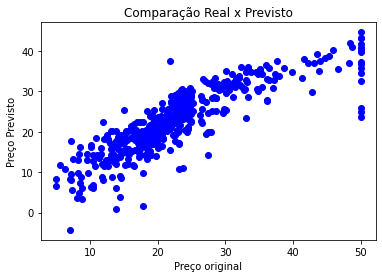

In [44]:
grafico_dispersao(y, previsao, 'Preço original', 'Preço Previsto', 'Comparação Real x Previsto')

In [47]:
performance(regressao, X, y)

O MSE (erro médio quadrado) é 21.894831
Score de variação: 0.740643 (melhor performance = 1)


In [50]:
#Aplicando a apenas uma variável X:
nova_regr = LinearRegression()
nova_regr.fit(data[['PTRATIO']], data.Price)
performance(nova_regr, data[['PTRATIO']], data.Price)

O MSE (erro médio quadrado) é 62.652200
Score de variação: 0.257847 (melhor performance = 1)


In [59]:
#Treino e Teste
x_treino = X[:-50]
x_teste = X[-50:]

y_treino = y[:-50]
y_teste = y[-50:]

In [67]:
print(X.shape, y.shape, x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(506, 13) (506,) (456, 13) (50, 13) (456,) (50,)


In [68]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(X, y)

In [69]:
print(X.shape, y.shape, x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape)

(506, 13) (506,) (379, 13) (127, 13) (379,) (127,)


In [70]:
regr3 = LinearRegression()
regr3.fit(x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
pred_treino = regr3.predict(x_treino)
pred_teste =regr3.predict(x_teste)

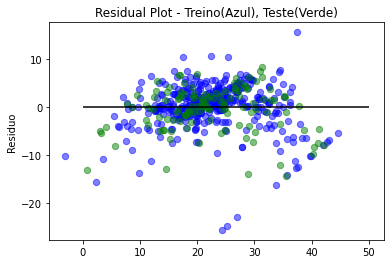

In [74]:
plt.scatter(pred_treino, pred_treino - y_treino, color='blue', s=40, alpha=0.5)
plt.scatter(pred_teste, pred_teste - y_teste, color='green', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=50)
plt.ylabel('Residuo')
plt.title('Residual Plot - Treino(Azul), Teste(Verde)')
plt.show()